In [1]:
import numpy as np
import h5py
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import display
from PIL import Image
import ast
import time as tt

In [2]:
# get simulation time details
def convert_hecras_timedata(time_data):
    time_series = []
    for tstep in time_data:
        time_str = tstep.decode('UTF-8')  # Convert byte data to str
        time_stamp = datetime.strptime(time_str, '%d%b%Y %H:%M:%S')  # Convert to datetime
        time_series.append(time_stamp)  # Append timestep to timeseries

    time = np.array(time_series)  # Convert to numpy array
    return time

def get_timedata(path):
    hec = h5py.File(path, 'r')  # Open to read data
    # Get time data
    time_data = hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series'] \
        ['Time Date Stamp']

    time = convert_hecras_timedata(time_data)

    hec.close()  # Close

    return time

#### Read HDF file

In [14]:
hec_result_path = "/Users/jiayulim/Documents/GitHub/dual_flood_gnn/data/Model4/raw/HEC-RAS_Results/Model_part3.p07.hdf"
hec = h5py.File(hec_result_path, 'r')
time_list = get_timedata(hec_result_path)
value = np.array(hec['Geometry']['2D Flow Areas'])[3]
value

np.str_('Perimeter 1')

### 1. Dynamic Features
#### 1.1 1D Node Features
##### To get the location of each 1D nodes, refer to the Nodes_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.1.1 Water Levels (units: m)

In [4]:
WSE = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Water Surface'])
column_names = [str(i) for i in range(WSE.shape[1])]
WSE = pd.DataFrame(WSE, columns=column_names)
WSE.insert(0, "Time", time_list)
WSE = WSE.set_index('Time')
WSE

,0,1,2,3,4,5,6,7,8,9,...,283,284,285,286,287,288,289,290,291,292
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,1.729461,1.369874,3.326592,3.033504,4.254306,5.327383,11.271139,10.601817,1.214404,1.100000,...,23.378773,20.109198,21.310963,18.411896,6.971332,6.500000,30.184237,12.268121,15.013144,9.620646
2008-09-01 00:05:00,1.729461,1.369874,3.326592,3.033504,4.254306,5.327383,11.271139,10.601817,1.214404,1.100000,...,23.378773,20.109198,21.310963,18.411896,6.971332,6.500000,30.184237,12.268121,15.013144,9.620646
2008-09-01 00:10:00,1.729461,1.369874,3.326592,3.033504,4.254306,5.327383,11.271139,10.601817,1.214404,1.100000,...,23.378773,20.109198,21.310963,18.411896,6.971332,6.500000,30.184237,12.268121,15.013144,9.620646
2008-09-01 00:15:00,1.729461,1.369874,3.326592,3.033504,4.254306,5.327383,11.271139,10.601817,1.214404,1.100000,...,23.378773,20.109198,21.310963,18.411896,6.971332,6.500000,30.184237,12.268121,15.013144,9.620646
2008-09-01 00:20:00,1.729461,1.369874,3.326592,3.033504,4.254306,5.327383,11.271139,10.601817,1.214404,1.100000,...,23.378773,20.109198,21.310963,18.411896,6.971332,6.500000,30.184237,12.268121,15.013144,9.620646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,1.785691,1.442197,3.386349,3.094673,4.301834,5.371128,11.288745,10.615897,1.298966,1.173401,...,23.378883,20.115940,21.314219,18.415974,6.980514,6.517395,30.184237,12.273626,15.013144,9.627679
2008-09-02 16:45:00,1.785370,1.441656,3.385998,3.094305,4.301590,5.370803,11.288639,10.615817,1.298522,1.172859,...,23.378883,20.115902,21.314198,18.415955,6.980462,6.517309,30.184237,12.273599,15.013144,9.627641
2008-09-02 16:50:00,1.785047,1.441124,3.385648,3.093938,4.301351,5.370484,11.288534,10.615738,1.298082,1.172312,...,23.378880,20.115868,21.314177,18.415934,6.980411,6.517223,30.184237,12.273572,15.013144,9.627604


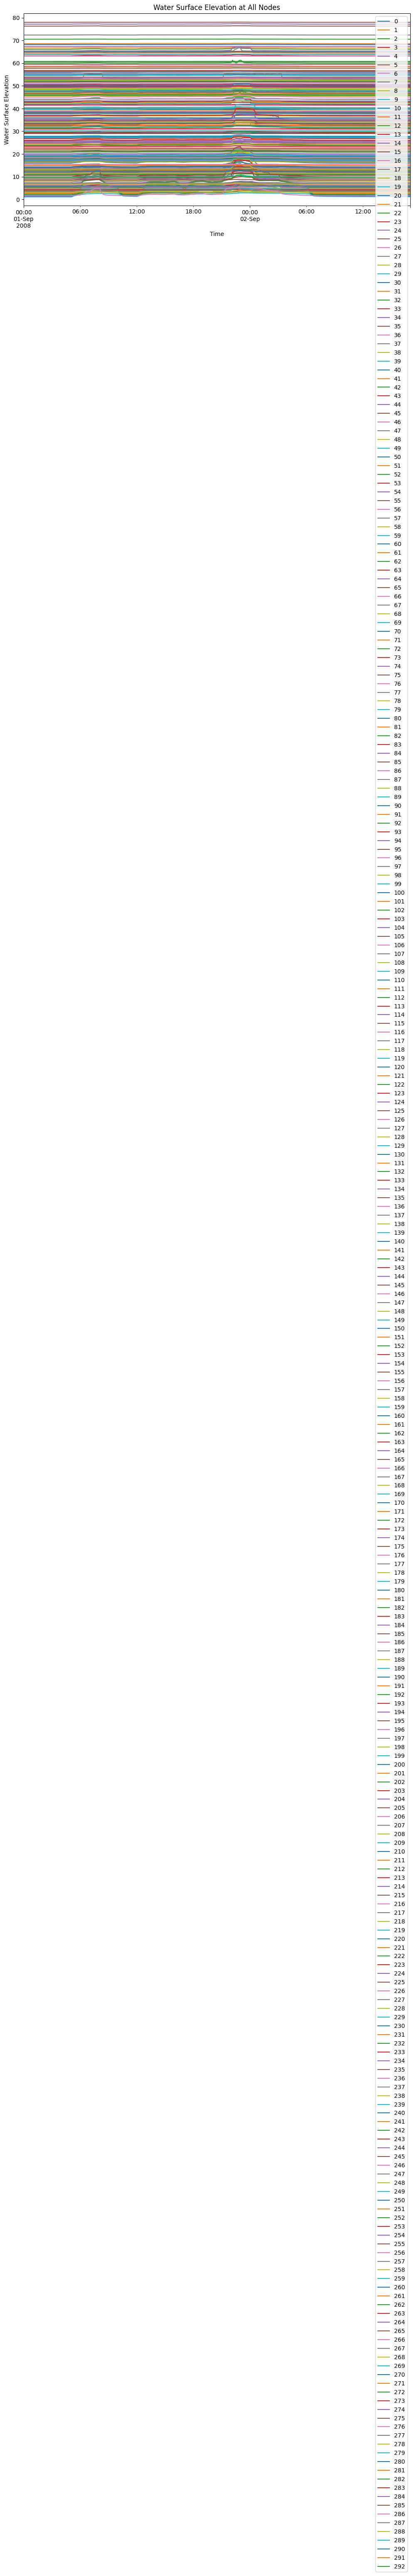

In [5]:
WSE.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Water Surface Elevation")
plt.title("Water Surface Elevation at All Nodes")
plt.show()

#### 1.1.2 Flow from 2D cells to 1D nodes (Units: m^3/s)
##### To see the connections between 1D to 2D open Node1D_to_Node2D_Links.shp file

In [6]:
Inlet_Flow = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Drop Inlet Flow'])
column_names = [str(i) for i in range(Inlet_Flow.shape[1])]
Inlet_Flow = pd.DataFrame(Inlet_Flow, columns=column_names)
Inlet_Flow.insert(0, "Time", time_list)
Inlet_Flow = Inlet_Flow.set_index('Time')
Inlet_Flow

,0,1,2,3,4,5,6,7,8,9,...,283,284,285,286,287,288,289,290,291,292
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,0.0,...,-0.0,-0.000000,-0.000000,-0.0,-0.000000,0.0,-0.0,-0.000000,-0.0,-0.000000
2008-09-01 00:05:00,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,0.0,...,-0.0,-0.000000,-0.000000,-0.0,-0.000000,0.0,-0.0,-0.000000,-0.0,-0.000000
2008-09-01 00:10:00,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,0.0,...,-0.0,-0.000000,-0.000000,-0.0,-0.000000,0.0,-0.0,-0.000000,-0.0,-0.000000
2008-09-01 00:15:00,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,0.0,...,-0.0,-0.000000,-0.000000,-0.0,-0.000000,0.0,-0.0,-0.000000,-0.0,-0.000000
2008-09-01 00:20:00,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,0.0,...,-0.0,-0.000000,-0.000000,-0.0,-0.000000,0.0,-0.0,-0.000000,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,0.000006,3.049815e-09,0.000028,0.000007,0.000092,0.000007,2.476054e-07,0.000027,8.245256e-07,0.0,...,-0.0,0.000071,0.000054,-0.0,0.000006,0.0,-0.0,0.000130,-0.0,0.000047
2008-09-02 16:45:00,0.000006,2.996440e-09,0.000028,0.000007,0.000090,0.000007,2.454700e-07,0.000026,8.164052e-07,0.0,...,-0.0,0.000070,0.000053,-0.0,0.000006,0.0,-0.0,0.000128,-0.0,0.000046
2008-09-02 16:50:00,0.000006,2.944365e-09,0.000027,0.000007,0.000088,0.000007,2.433766e-07,0.000026,8.084221e-07,0.0,...,-0.0,0.000070,0.000053,-0.0,0.000006,0.0,-0.0,0.000127,-0.0,0.000046


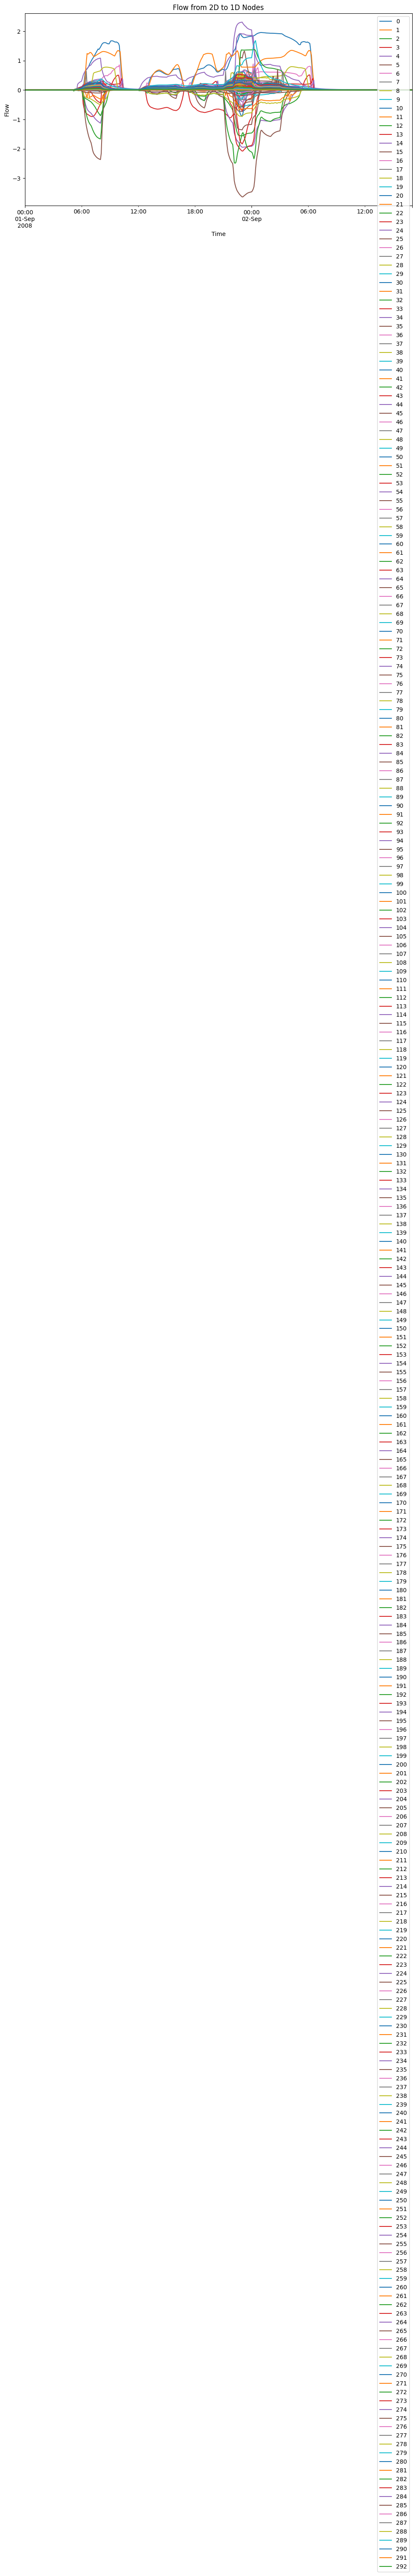

In [7]:
Inlet_Flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow from 2D to 1D Nodes")
plt.show()

#### 1.2 1D Link Features
##### To get the location of each 1D link, refer to the Links_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.2.1 Velocity (units: m/s)

In [8]:
vel_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel DS'])
vel_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel US'])
vel = (vel_DS + vel_US)/2
column_names = [str(i) for i in range(vel.shape[1])]
vel = pd.DataFrame(vel, columns=column_names)
vel.insert(0, "Time", time_list)
vel = vel.set_index('Time')
vel

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,0.573508,0.559050,0.733835,0.850120,0.414396,0.329930,0.618747,0.408131,0.604136,0.536162,...,0.000424,0.000283,0.247832,0.308775,0.202651,0.000300,0.272724,0.000378,0.482151,0.391010
2008-09-02 16:45:00,0.571696,0.557120,0.731435,0.846308,0.412800,0.328752,0.616634,0.406633,0.601678,0.534049,...,0.000421,0.000281,0.247017,0.307720,0.201784,0.000297,0.271819,0.000377,0.480559,0.389586
2008-09-02 16:50:00,0.569862,0.555195,0.729060,0.842541,0.411226,0.327564,0.614511,0.405154,0.599251,0.531963,...,0.000418,0.000278,0.246212,0.306677,0.200927,0.000295,0.270924,0.000375,0.478982,0.388177


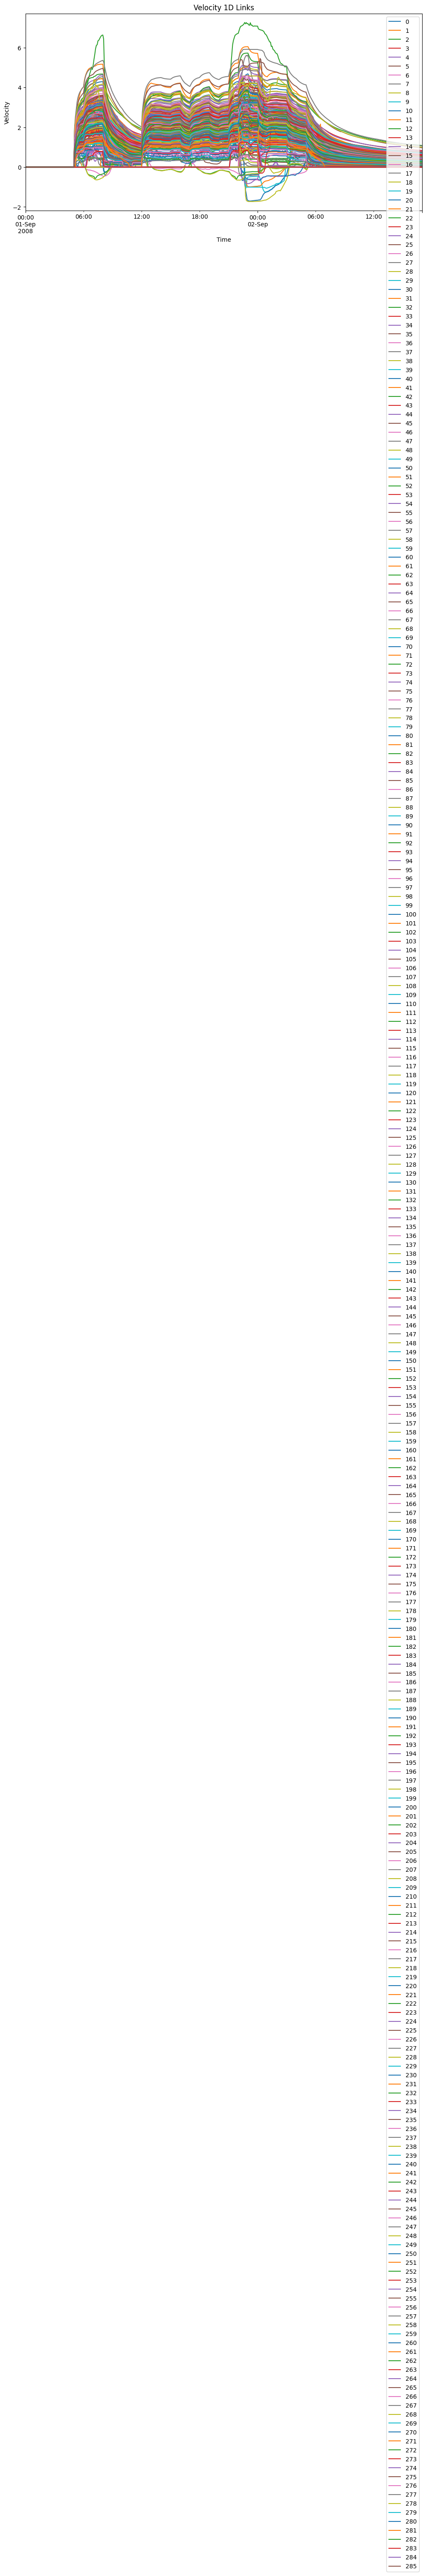

In [9]:
vel.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity 1D Links")
plt.show()

#### 1.2.2 Flow (Units: m^3/s)

In [10]:
flow_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow DS'])
flow_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow US'])
flow = (flow_DS + flow_US)/2
column_names = [str(i) for i in range(flow.shape[1])]
flow = pd.DataFrame(flow, columns=column_names)
flow.insert(0, "Time", time_list)
flow = flow.set_index('Time')
flow

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
2008-09-01 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
2008-09-01 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
2008-09-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
2008-09-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,0.014737,0.014440,0.013552,0.013450,0.001604,0.015525,0.014707,0.001363,0.003561,0.002704,...,4.286446e-12,1.192871e-09,0.000054,0.000125,0.000308,3.726141e-10,0.000125,3.485506e-12,0.000255,0.000302
2008-09-02 16:45:00,0.014551,0.014256,0.013379,0.013279,0.001584,0.015332,0.014521,0.001347,0.003518,0.002673,...,4.210623e-12,1.174400e-09,0.000053,0.000124,0.000305,3.668409e-10,0.000124,3.441649e-12,0.000252,0.000298
2008-09-02 16:50:00,0.014365,0.014074,0.013210,0.013111,0.001566,0.015139,0.014336,0.001331,0.003475,0.002642,...,4.136676e-12,1.156366e-09,0.000053,0.000122,0.000301,3.612042e-10,0.000122,3.398561e-12,0.000249,0.000295


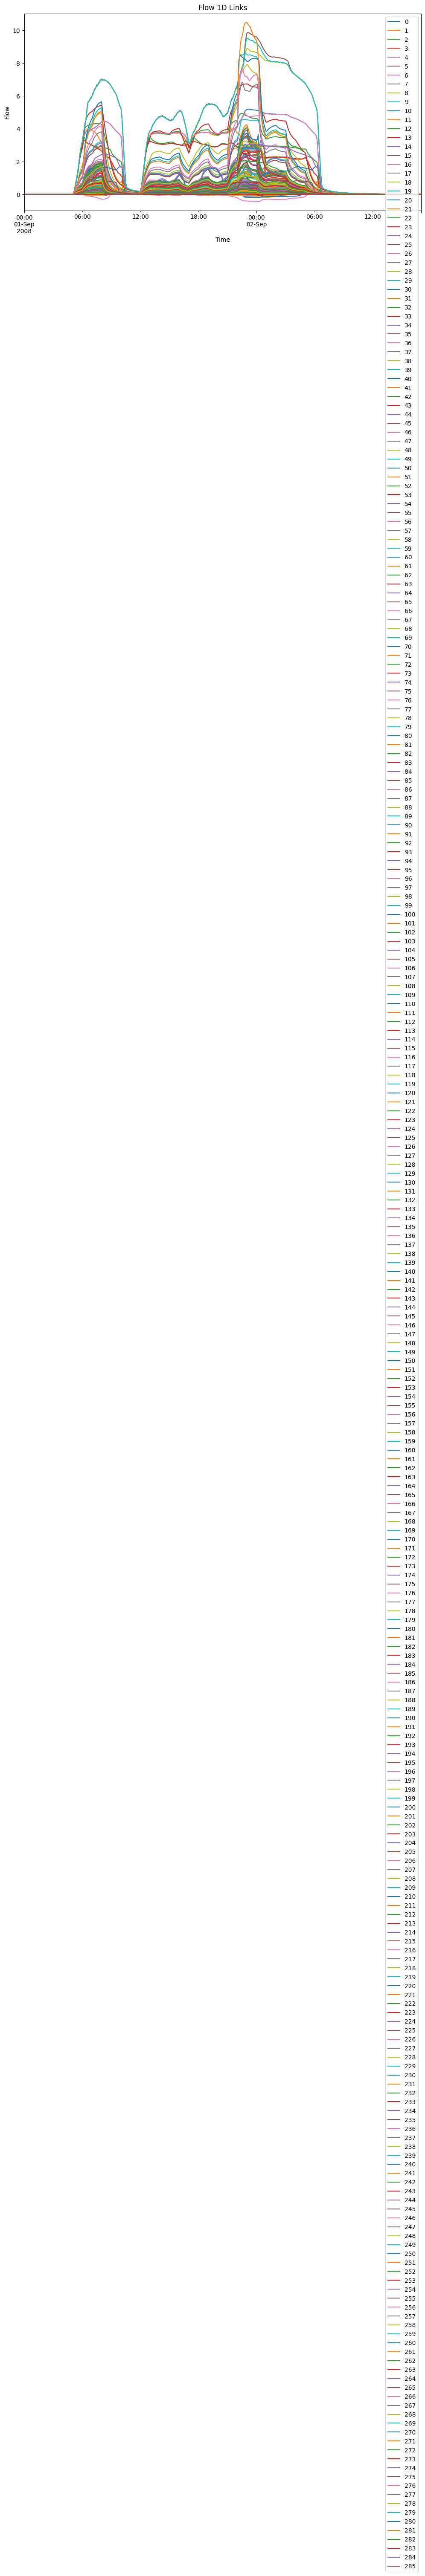

In [11]:
flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow 1D Links")
plt.show()

#### 1.3 2D Node features
##### To see node locations open and see Nodes_2D.shp, type = boundary are boundary nodes
#### 1.3.1 Water Level (Units: m)

In [12]:
wl=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Water Surface'])
column_names = [str(i) for i in range(wl.shape[1])]
df = pd.DataFrame(wl, columns=column_names)
df.insert(0, "Time", time_list)
df = df.set_index('Time')
df

,0,1,2,3,4,5,6,7,8,9,...,9211,9212,9213,9214,9215,9216,9217,9218,9219,9220
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,79.515434,79.863525,68.344719,69.391296,70.129486,79.175819,79.426430,79.911530,80.328964,80.569038,...,44.648159,1.0,64.244469,67.833328,60.916286,53.463272,63.95364,55.824951,1.0,61.971706
2008-09-01 00:05:00,79.515434,79.863525,68.344719,69.391296,70.129486,79.175819,79.426430,79.911530,80.328964,80.569038,...,44.648159,1.0,64.244469,67.833328,60.916286,53.463272,63.95364,55.824951,1.0,61.971706
2008-09-01 00:10:00,79.515434,79.863525,68.344719,69.391296,70.129486,79.175819,79.426430,79.911530,80.328964,80.569038,...,44.648159,1.0,64.244469,67.833328,60.916286,53.463272,63.95364,55.824951,1.0,61.971706
2008-09-01 00:15:00,79.515434,79.863525,68.344719,69.391296,70.129486,79.175819,79.426430,79.911530,80.328964,80.569038,...,44.648159,1.0,64.244469,67.833328,60.916286,53.463272,63.95364,55.824951,1.0,61.971706
2008-09-01 00:20:00,79.515434,79.863525,68.344719,69.391296,70.129486,79.175819,79.426430,79.911530,80.328964,80.569038,...,44.648159,1.0,64.244469,67.833328,60.916286,53.463272,63.95364,55.824951,1.0,61.971706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,79.580772,79.940254,68.775696,69.405930,70.215302,79.198311,79.456215,79.939697,80.354797,80.591423,...,44.648159,1.0,64.280632,68.666222,64.474304,57.112518,63.95364,55.824951,1.0,61.971706
2008-09-02 16:45:00,79.580750,79.940239,68.775688,69.405876,70.215286,79.198227,79.456108,79.939667,80.354706,80.591354,...,44.648159,1.0,64.280525,68.666214,64.474083,57.112411,63.95364,55.824951,1.0,61.971706
2008-09-02 16:50:00,79.580742,79.940208,68.775688,69.405823,70.215279,79.198143,79.456009,79.939651,80.354622,80.591278,...,44.648159,1.0,64.280418,68.666214,64.473862,57.112305,63.95364,55.824951,1.0,61.971706


#### 1.3.2 Water Volume (m^3)

In [15]:
vol_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Cell Volume'])
column_names = [str(i) for i in range(vol_data.shape[1])]
vol_df = pd.DataFrame(vol_data, columns=column_names)
vol_df.insert(0, "Time", time_list)
vol_df = vol_df.set_index('Time')
vol_df

KeyError: "Unable to synchronously open object (object 'Cell Volume' doesn't exist)"

#### 1.3.3 Rainfall (Units: mm)

In [16]:
# rainfall is cumulative; convert to DataFrame
rainfall = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']
                    ['Unsteady Time Series']['2D Flow Areas'][value]
                    ['Cell Cumulative Precipitation Depth'])

column_names = [str(i) for i in range(rainfall.shape[1])]
rain_df = pd.DataFrame(rainfall, columns=column_names)
rain_df.insert(0, "Time", time_list)
rain_df.set_index("Time", inplace=True)

# 🔻 Compute incremental rainfall (difference between time steps)
rain_increment = rain_df.diff()    # difference between rows
rain_increment.iloc[0] = rain_df.iloc[0]   # first timestep stays as-is

rain_increment

,0,1,2,3,4,5,6,7,8,9,...,9211,9212,9213,9214,9215,9216,9217,9218,9219,9220
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-02 16:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-02 16:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


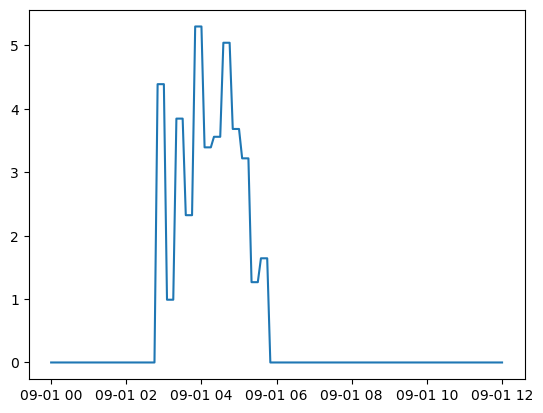

In [ ]:
plt.plot(rain_increment['1'])

#### 1.4 2D Link Features
#### 1.4.1 Velocity (Units: m/s)

In [17]:
vel=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Face Velocity'])
column_names = [str(i) for i in range(vel.shape[1])]
vel_df = pd.DataFrame(vel, columns=column_names)
vel_df.insert(0, "Time", time_list)
vel_df = vel_df.set_index('Time')
vel_df

,0,1,2,3,4,5,6,7,8,9,...,17871,17872,17873,17874,17875,17876,17877,17878,17879,17880
Time,,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00,0.000000,0.0,-0.0,0.0,0.0,0.000000,-0.0,0.000000,-0.000000,-0.000000,...,0.0,-0.000008,0.0,0.0,0.0,0.0,0.0,0.0,-9.049823e-07,0.0
2008-09-01 00:05:00,0.000000,0.0,-0.0,0.0,0.0,0.000000,-0.0,0.000000,-0.000000,-0.000000,...,0.0,-0.000024,0.0,0.0,0.0,0.0,0.0,0.0,-8.420442e-06,0.0
2008-09-01 00:10:00,0.000000,0.0,-0.0,0.0,0.0,0.000000,-0.0,0.000000,-0.000000,-0.000000,...,0.0,-0.000007,0.0,0.0,0.0,0.0,0.0,0.0,-1.278204e-06,0.0
2008-09-01 00:15:00,0.000000,0.0,-0.0,0.0,0.0,0.000000,-0.0,0.000000,-0.000000,-0.000000,...,0.0,-0.000028,0.0,0.0,0.0,0.0,0.0,0.0,-1.715900e-06,0.0
2008-09-01 00:20:00,0.000000,0.0,-0.0,0.0,0.0,0.000000,-0.0,0.000000,-0.000000,-0.000000,...,0.0,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,-4.553575e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-02 16:40:00,0.003557,-0.0,-0.0,0.0,0.0,0.000002,-0.0,0.006317,-0.000811,-0.009543,...,0.0,0.000369,0.0,0.0,0.0,0.0,0.0,0.0,1.652088e-04,0.0
2008-09-02 16:45:00,0.003540,-0.0,-0.0,0.0,0.0,0.000002,-0.0,0.006279,-0.000805,-0.009485,...,0.0,0.000367,0.0,0.0,0.0,0.0,0.0,0.0,1.646038e-04,0.0
2008-09-02 16:50:00,0.003523,-0.0,-0.0,0.0,0.0,0.000002,-0.0,0.006241,-0.000799,-0.009428,...,0.0,0.000365,0.0,0.0,0.0,0.0,0.0,0.0,1.639208e-04,0.0


#### 1.4.2 Flow (Units: m^3/s)

In [18]:
flow_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Face Flow'])
column_names = [str(i) for i in range(flow_data.shape[1])]
flow_df = pd.DataFrame(flow_data, columns=column_names)
flow_df.insert(0, "Time", time_list)
flow_df = flow_df.set_index('Time')
flow_df

KeyError: "Unable to synchronously open object (object 'Face Flow' doesn't exist)"

#### Notes
##### Open each shapefile in Geometry folder in QGIS to visualise the numerical computational mesh/nodes/links. 
##### You may see number of nodes in Nodes_2D.shp is higher than the Mesh_2D.shp
##### This is because HEC-RAS adds additional cells called ghost cells. Except the boundary nodes all other ghost cells can be removed.
##### Similarly all links connecting to or starting from ghost cells can be removed, except those connected to boundary nodes.
##### Boundary nodes are given as type = boundary in Nodes_2D.shp file
##### Following code gives all ghost cell indexes including boundary nodes


In [ ]:
# identify ghost cells
min_elevation = np.array(hec['Geometry']['2D Flow Areas'][value]['Cells Minimum Elevation']) 
Ghost_cells_idx = np.where(np.isnan(min_elevation))[0]
Ghost_cells_idx

array([8801, 8802, 8803, 8804, 8805, 8806, 8807, 8808, 8809, 8810, 8811,
       8812, 8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820, 8821, 8822,
       8823, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 8831, 8832, 8833,
       8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8842, 8843, 8844,
       8845, 8846, 8847, 8848, 8849, 8850, 8851, 8852, 8853, 8854, 8855,
       8856, 8857, 8858, 8859, 8860, 8861, 8862, 8863, 8864, 8865, 8866,
       8867, 8868, 8869, 8870, 8871, 8872, 8873, 8874, 8875, 8876, 8877,
       8878, 8879, 8880, 8881, 8882, 8883, 8884, 8885, 8886, 8887, 8888,
       8889, 8890, 8891, 8892, 8893, 8894, 8895, 8896, 8897, 8898, 8899,
       8900, 8901, 8902, 8903, 8904, 8905, 8906, 8907, 8908, 8909, 8910,
       8911, 8912, 8913, 8914, 8915, 8916, 8917, 8918, 8919, 8920, 8921,
       8922, 8923, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931, 8932,
       8933, 8934, 8935, 8936, 8937, 8938, 8939, 8940, 8941, 8942, 8943,
       8944, 8945, 8946, 8947, 8948, 8949, 8950, 89